# Apple and Google Tweet Sentiment Analysis

## Introduction

In today's digital economy, social media platforms serve as critical touchpoints between consumers and brands. Tweets, in particular, offer real-time insights into public opinion, customer satisfaction, and brand perception. This project leverages Natural Language Processing (NLP) techniques to analyze public sentiment toward Apple and Google products. By using a dataset of 9,093 tweets, each labeled as positive, negative, or neutral, we aim to develop predictive models capable of accurately classifying sentiment. 

This project demonstrates advanced supervised machine learning methods applied to textual data. We will begin with a binary classification approach, distinguishing positive from negative sentiment, before expanding to multiclass classification to include neutral tweets. Additionally, advanced NLP techniques, such as TF-IDF vectorization, word embeddings, and optionally transformer-based models like BERT, will be considered to enhance performance. The final deliverables will include a reproducible workflow, evaluation metrics, and actionable insights for stakeholders.

The primary objective is to create a proof-of-concept sentiment analysis system that not only predicts sentiment accurately but also provides interpretable insights for decision-making. This project highlights a structured, end-to-end NLP pipeline, demonstrating our proficiency in data preprocessing, feature engineering, model development, evaluation, and business-oriented interpretation of results.

---

## Business Understanding

Understanding public sentiment on social media is crucial for technology companies such as Apple and Google. Stakeholders—including product managers, marketing teams, and customer experience departments—rely on timely, actionable insights to make informed decisions regarding product development, brand positioning, and customer engagement strategies.

The objectives of this project are threefold:

1. **Sentiment Classification:** Develop models capable of automatically classifying tweets as positive, negative, or neutral, thereby quantifying customer sentiment at scale.
2. **Trend Analysis:** Identify patterns in public opinion to detect emerging issues, customer satisfaction levels, and potential product strengths or weaknesses.
3. **Business Actionability:** Enable stakeholders to implement data-driven interventions, such as addressing negative feedback promptly, amplifying positive experiences, or tailoring marketing campaigns to current sentiment trends.

The business value of this project lies in its ability to transform unstructured social media data into structured, actionable intelligence. Accurate sentiment analysis enables proactive brand management, real-time product monitoring, and improved customer engagement. By providing both predictive accuracy and interpretability, this project empowers stakeholders to make strategic decisions that directly impact brand perception and customer satisfaction.


## Data Understanding

The dataset originates from CrowdFlower via data.world and contains **9,093 labeled tweets** spanning multiple brands and products. Contributors manually annotated each tweet based on sentiment: positive, negative, or neutral. When sentiment was expressed, the specific target brand or product was also identified, enabling granular analysis.

### Key Properties of the Dataset:
- **Text content:** Raw tweet messages containing informal language, abbreviations, hashtags, mentions, emojis, and other social media-specific text features.
- **Sentiment label:** Target variable with three classes: `positive`, `negative`, `neutral`.
- **Target brand/product (optional):** Identifies which product or brand the sentiment pertains to, enabling more nuanced analysis if required.

### Dataset Utility:
- **Supervised Learning Suitability:** The presence of labeled sentiment allows training of supervised classification models. This enables robust evaluation and iterative improvement of model performance.
- **Sample Size Adequacy:** With over 9,000 tweets, the dataset provides sufficient representation for initial model development, hyperparameter tuning, and validation.
- **Real-World Relevance:** Tweets reflect authentic, unfiltered public opinion, making insights derived from this data highly applicable to brand management and marketing strategies.

### Limitations and Challenges:
- **Language Constraints:** The dataset primarily contains English-language tweets, which may limit global applicability.
- **Text Complexity:** Tweets include slang, abbreviations, emojis, and non-standard grammar, necessitating careful preprocessing.
- **Class Imbalance:** Neutral sentiment may dominate the dataset, creating potential challenges for model learning and requiring consideration of class weighting or sampling techniques.
- **Temporal Considerations:** Tweets were collected prior to 2013; modern sentiment trends may differ, though the dataset remains valuable for modeling and methodological demonstration.

**Added:** August 30, 2013 by Kent Cavender-Bares

This dataset offers a strong foundation for building an end-to-end NLP pipeline, demonstrating data preparation, feature extraction, model development, evaluation, and business-oriented interpretation of sentiment trends.


### Importing Relevant Libraries

In [184]:
# -----------------------------
# General Data Handling
# -----------------------------
import pandas as pd           # Data manipulation and analysis
import numpy as np            # Numerical operations
import os                     # File and directory handling
import re                     # Regular expressions for text cleaning
from collections import Counter

# -----------------------------
# Visualization
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# -----------------------------
# NLP Preprocessing
# -----------------------------
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# -----------------------------
# Feature Extraction
# -----------------------------
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# -----------------------------
# Machine Learning Models
# -----------------------------
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# -----------------------------
# Advanced NLP / Optional
# -----------------------------


# -----------------------------
# Misc
# -----------------------------
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Data

In [185]:
import pandas as pd

sentimentdata = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='latin1')
sentimentdata.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Data overview

In [186]:
# Step 1b: Basic info about the dataset
sentimentdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [187]:
sentimentdata.describe(include="object")


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


### Data Exploration & Findings

- **Dataset Size:** 9,093 tweets with 3 columns.  
- **tweet_text:** 9,092 non-null, 9,065 unique. Top repeated tweet appears 5 times. Needs cleaning (URLs, mentions, hashtags, emojis, punctuation), lowercase conversion, and deduplication.  
- **emotion_in_tweet_is_directed_at:** 3,291 non-null (~64% missing). Most frequent target: "iPad" (946 mentions). Options: fill missing with "Unknown" or drop rows without targets. Normalize target labels for consistency.  
- **is_there_an_emotion_directed_at_a_brand_or_product:** . Majority are "No emotion toward brand or product" (5,389 entries), indicating class imbalance. Needs encoding for modeling.  
- **Insights:**  
  - Tweets are mostly unique, real-world social media text, containing slang, abbreviations, and emojis.  
  - Class imbalance and missing target information must be addressed.  
  - Dataset is suitable for supervised NLP sentiment analysis with careful preprocessing.  

✅ Next: Build a preprocessing pipeline to clean text, handle missing values, deduplicate, normalize labels, tokenize and lemmatize, and prepare features for modeling.


## Data Cleaning and Preprocessing

In [188]:
# 2.1 Drop any rows with missing tweet_text
sentimentdata = sentimentdata.dropna(subset=['tweet_text'])

# 2.2 Remove duplicate tweets
sentimentdata = sentimentdata.drop_duplicates(subset=['tweet_text'])

# Check the dataset info after cleaning
sentimentdata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9065 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9065 non-null   object
 1   emotion_in_tweet_is_directed_at                     3280 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9065 non-null   object
dtypes: object(3)
memory usage: 283.3+ KB


Dropping tweets with missing text ensures no empty data is fed into NLP models.

Removing duplicates prevents bias and overfitting caused by repeated tweets.

In [189]:
# Fill missing 'emotion_in_tweet_is_directed_at' with 'Unknown'
sentimentdata['emotion_in_tweet_is_directed_at'] = sentimentdata['emotion_in_tweet_is_directed_at'].fillna('Unknown')

# Check the updated counts
sentimentdata['emotion_in_tweet_is_directed_at'].value_counts()


emotion_in_tweet_is_directed_at
Unknown                            5785
iPad                                943
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

About 64% of the 'emotion_in_tweet_is_directed_at' column was missing.

Filling missing values with "Unknown" allows us to keep all tweets for modeling.

This column represents the brand or product the tweet refers to.

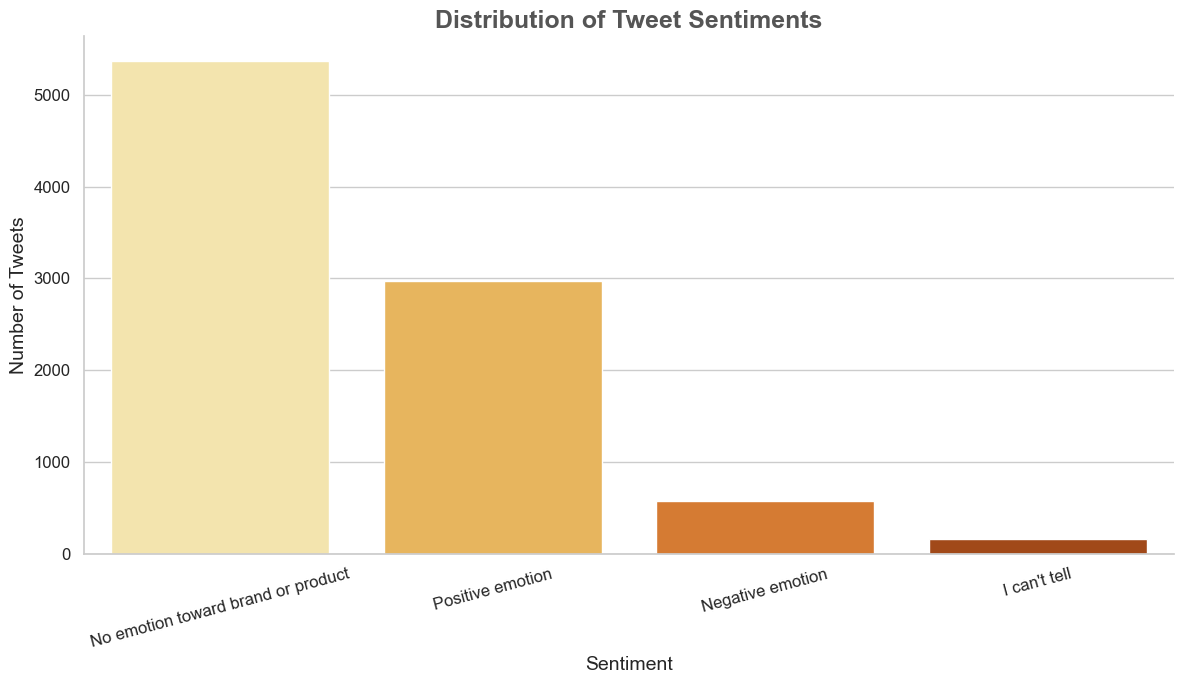

In [190]:
#  Sentiment distribution visualization (HD, yellow palette)
plt.figure(figsize=(12,7))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=sns.color_palette("YlOrBr", len(sentiment_counts))  # Shades of yellow-orange
)
plt.title("Distribution of Tweet Sentiments", fontsize=18, weight='bold', color='#555555')
plt.ylabel("Number of Tweets", fontsize=14)
plt.xlabel("Sentiment", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()  # Clean modern look
plt.tight_layout()

# Save HD figure to 'output' folder
plt.savefig('output/sentiment_distribution_yellow.png', dpi=400)  # 400 dpi for high quality
plt.show()


## Distribution of Tweet Sentiments

- **Neutral (No emotion toward brand or product):** ~5000 tweets  
- **Positive emotion:** ~2500–3000 tweets  
- **Negative emotion:** ~500–700 tweets  
- **Unclear (I can’t tell):** <200 tweets  

### Insights
- Most tweets were **neutral**, mainly sharing news or links.  
- **Positive tweets** were significantly higher than negatives, showing favorable sentiment overall.  
- **Negative tweets** were a small minority.  
- Very few tweets were **ambiguous** in sentiment.


In [191]:

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources (only first run)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Define cleaning function
def clean_text_nltk(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)                # Remove mentions & hashtags
    text = re.sub(r"[^a-z\s]", "", text)                 # Remove punctuation & numbers
    words = word_tokenize(text)                          # Tokenize
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords + stem
    return " ".join(words)

# Apply to DataFrame
sentimentdata['clean_text'] = sentimentdata['tweet_text'].apply(clean_text_nltk)

# Preview cleaned text
sentimentdata[['tweet_text', 'clean_text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet_text,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphon hrs tweet dead need upgrad plugin station
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesom ipadiphon app youll like appreci d...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festiv isnt crashi year iphon app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer googl tim oreill...


Brief Explanation:

Converts all text to lowercase.
Removes unwanted elements (URLs, mentions, hashtags, punctuation).
Tokenizes text and removes common stopwords.
Applies stemming to reduce words to their base form.

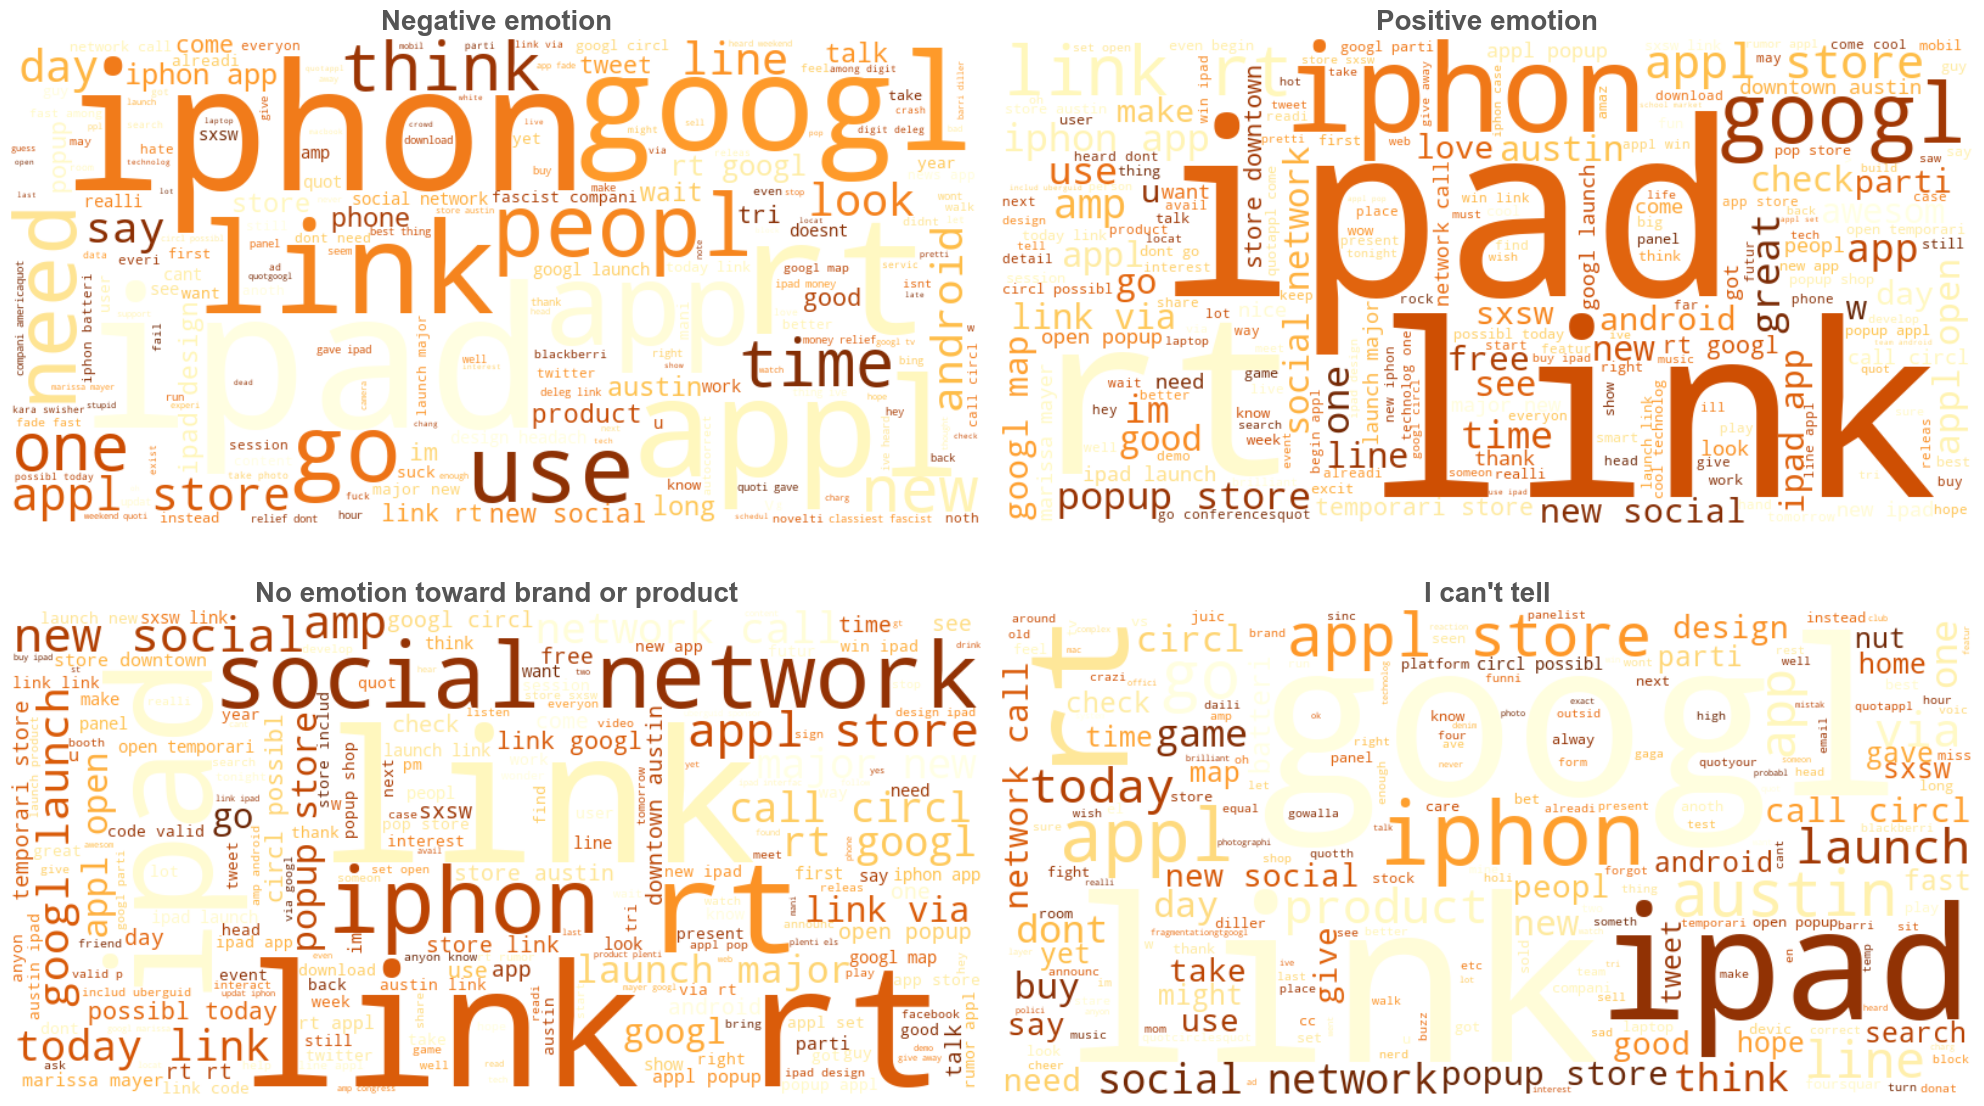

In [192]:
from wordcloud import STOPWORDS

sentiments = sentimentdata['is_there_an_emotion_directed_at_a_brand_or_product'].unique()
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for ax, sentiment in zip(axes.flatten(), sentiments):
    text = sentimentdata[sentimentdata['is_there_an_emotion_directed_at_a_brand_or_product']==sentiment]['clean_text']
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='YlOrBr',
        max_words=200,
        stopwords=STOPWORDS
    ).generate(" ".join(text))
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"{sentiment}", fontsize=20, weight='bold', color='#555555')

plt.tight_layout()
plt.savefig('output/combined_wordclouds.png', dpi=400)
plt.show()


 Word Cloud Insights
### Neutral (No emotion)
- Common words: **link, iPad, iPhone, app, social network, Google**  
- Mostly factual mentions (event updates, product launches, links).  

### Positive Emotion
- Frequent terms: **iPad, iPhone, app, store, great, good, free,**  
- Excitement and approval, especially around **Apple products at SXSW**.  

### Negative Emotion
- Words: **iPad, iPhone, Google, network, long, suck,**  
- Complaints about usability, design, or event issues.  

### Ambiguous (I can’t tell)
- Words: **iPad, link, Austin, app, think, new,check**  
- Mixed tone, harder to classify sentiment.  

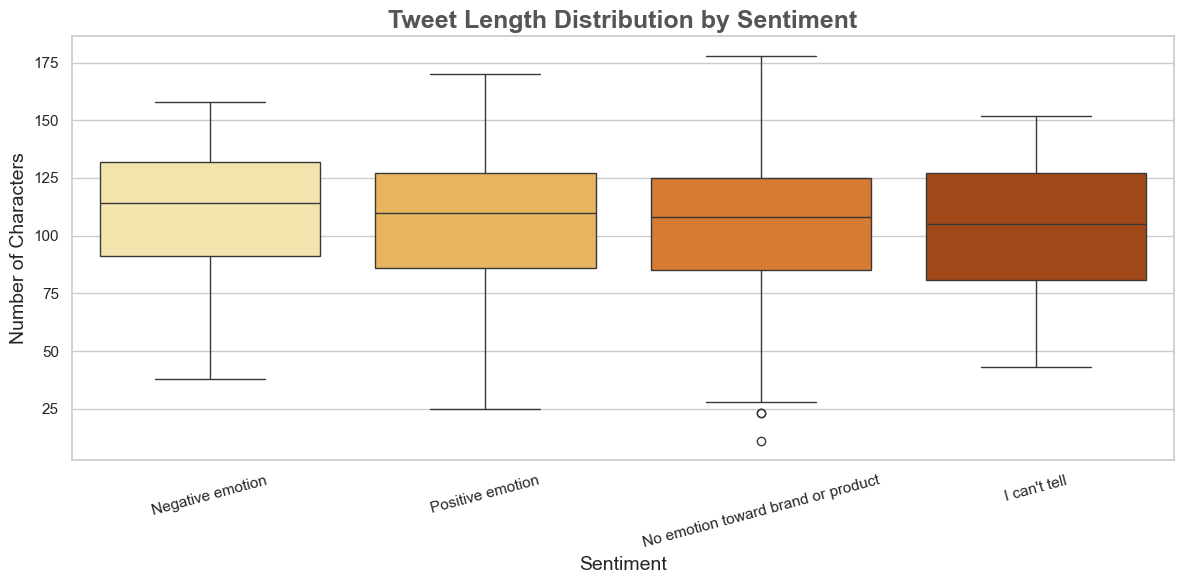

In [193]:
# Add tweet length column
sentimentdata['tweet_length'] = sentimentdata['tweet_text'].apply(len)

plt.figure(figsize=(12,6))
sns.boxplot(x='is_there_an_emotion_directed_at_a_brand_or_product', y='tweet_length', data=sentimentdata, palette="YlOrBr")
plt.title("Tweet Length Distribution by Sentiment", fontsize=18, weight='bold', color='#555555')
plt.ylabel("Number of Characters", fontsize=14)
plt.xlabel("Sentiment", fontsize=14)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('output/tweet_length_by_sentiment.png', dpi=400)
plt.show()


## Tweet Sentiment Analysis Summary

- **Sentiment Distribution**
  - Most tweets were **neutral** (~5000).
  - **Positive tweets** (~2500–3000) outnumber **negative tweets** (~500–700).
  - Very few tweets were **ambiguous** (<200).

- **Word Cloud Insights**
  - Top mentions: **SXSW, iPhone, iPad, Google**.
  - **Positive words**: great, awesome, free.  
  - **Negative words**: headache, fascist.  
  - Neutral tweets mostly contained factual or promotional terms.

- **Tweet Length by Sentiment**
  - **Negative tweets** are generally **longer** (more explanation).
  - **Positive tweets** are shorter and concise (~100 characters).
  - **Neutral tweets** vary widely (from very short links to long info).
  - **Ambiguous tweets** are inconsistent in length.

### Key Takeaway
Most discussions around SXSW, Apple, and Google were **neutral or positive**, with negative opinions being fewer but typically longer.


## Binary Classification
Initial proof-of-concept focuses only on positive and negative tweets. Neutral tweets are excluded to simplify modeling and demonstrate baseline performance.


In [194]:
# Check unique values and their counts in the sentiment label column
sentimentdata['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()


is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5372
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [195]:
# 1) Prepare binary dataset (Positive vs Negative) and quick checks
# Assumes you already have sentimentdata and a cleaned column 'clean_text'

# Safety checks
if 'clean_text' not in sentimentdata.columns:
    raise ValueError("clean_text column not found. Run the cleaning cell before proceeding.")

# Keep only Positive/Negative rows (filter by text labels)
binary_data = sentimentdata[
    sentimentdata['is_there_an_emotion_directed_at_a_brand_or_product']
    .isin(['Positive emotion', 'Negative emotion'])
].copy()

# Map to binary labels: Positive=1, Negative=0
binary_data['sentiment'] = binary_data['is_there_an_emotion_directed_at_a_brand_or_product'] \
                               .map({'Positive emotion': 1, 'Negative emotion': 0})

# Drop rows with empty clean_text (if any)
binary_data = binary_data[binary_data['clean_text'].str.strip() != '']

# Show counts and a couple of examples
print("Class counts:\n", binary_data['sentiment'].value_counts())
binary_data[['tweet_text','clean_text','sentiment']].sample(5, random_state=42)


Class counts:
 sentiment
1    2968
0     569
Name: count, dtype: int64


,tweet_text,clean_text,sentiment
1793,The iPad 2 Takes Over SXSW [VIDEO] {link} #ipa...,ipad take sxsw video link,1
641,I knew if I plied @mention with beer and stogi...,knew pli beer stogi last night id weasel way t...,1
3559,@mention I outdid myself this time with the te...,outdid time tech iphonebroken might worst thin...,0
6292,RT @mention Marissa Mayer: Google Will Connect...,rt marissa mayer googl connect digit amp physi...,1
5390,RT @mention Android developers and friends: le...,rt android develop friend let hang p saturday ...,1


## Train-Test Split
The binary dataset (positive vs negative tweets) is split into 80% training and 20% testing sets, stratified by sentiment to maintain class balance.


In [196]:
# 2) Train/test split (80/20 stratified)
from sklearn.model_selection import train_test_split

X = binary_data['clean_text']
y = binary_data['sentiment']

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train size:", X_train_text.shape[0], "Test size:", X_test_text.shape[0])


Train size: 2829 Test size: 708


In [197]:
# 3) TF-IDF vectorization (fit on train only)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_train = tfidf.fit_transform(X_train_text)
X_test  = tfidf.transform(X_test_text)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (2829, 5000)
X_test shape: (708, 5000)


In [198]:
# 4) Train baseline models and collect predictions

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
}

model_preds = {}
model_objs = {}

for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    model_preds[name] = y_pred
    model_objs[name] = mdl

print("Trained models:", list(models.keys()))


Trained models: ['LogisticRegression', 'MultinomialNB', 'RandomForest']


In [199]:
# 5) Compute metrics and save a CSV summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rows = []
for name, y_pred in model_preds.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)   # positive class focus
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    # macro F1 for balanced view
    f1_macro = f1_score(y_test, y_pred, average='macro')
    rows.append((name, acc, prec, rec, f1, f1_macro))

metrics_df = pd.DataFrame(rows, columns=['Model','Accuracy','Precision_Pos','Recall_Pos','F1_Pos','F1_Macro'])
metrics_df = metrics_df.set_index('Model')
metrics_df

# Save metrics table
os.makedirs('output', exist_ok=True)
metrics_df.to_csv('output/binary_model_metrics.csv')
metrics_df


,Accuracy,Precision_Pos,Recall_Pos,F1_Pos,F1_Macro
Model,,,,,
LogisticRegression,0.855932,0.930070,0.895623,0.912521,0.752261
MultinomialNB,0.851695,0.849785,1.000000,0.918794,0.532567
RandomForest,0.870056,0.871302,0.991582,0.927559,0.648711


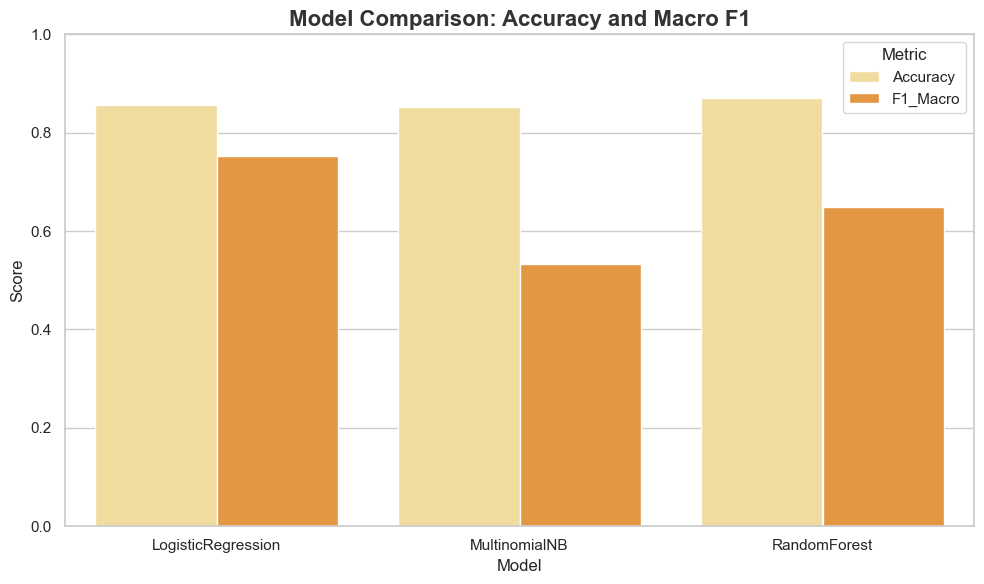

In [200]:
# 6) Plot metrics comparison (Accuracy / F1_macro) side-by-side
plt.figure(figsize=(10,6))
metrics_plot = metrics_df[['Accuracy','F1_Macro']].reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=metrics_plot, x='Model', y='Score', hue='Metric', palette=sns.color_palette("YlOrBr", 3))
plt.ylim(0,1)
plt.title("Model Comparison: Accuracy and Macro F1", fontsize=16, weight='bold', color='#333')
plt.ylabel("Score")
plt.tight_layout()
plt.savefig('output/model_comparison_metrics.png', dpi=400)
plt.show()


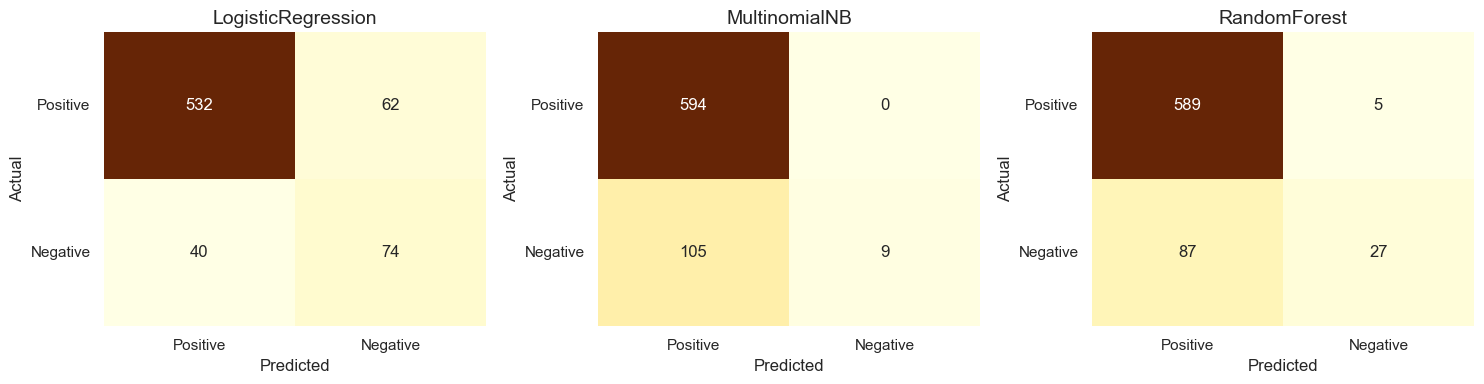

In [201]:
# 7) Plot confusion matrices for all models in one row and save
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, len(model_preds), figsize=(5*len(model_preds), 4))

for ax, (name, y_pred) in zip(axes.flatten(), model_preds.items()):
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])  # order: positive, negative
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False, ax=ax)
    ax.set_title(f"{name}", fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticklabels(['Positive','Negative'])
    ax.set_yticklabels(['Positive','Negative'], rotation=0)

plt.tight_layout()
plt.savefig('output/confusion_matrices_binary.png', dpi=400)
plt.show()


to continueee......